In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from spike_fxns import QC_BBP700_data, BriggsDecomposition, BriggsDecomposition_Modified
import statsmodels.api as sm

In [2]:

# Load QCd data file
# wmo = 1902368
# data = pd.read_pickle(glob.glob('/Volumes/FATDATABABY/Spikes/RTQC/'+str(int(wmo))+'/*'+str(int(wmo))+'.pkl')[0])
data = pd.read_pickle('aoml_BR1902368.pkl')
# Refromat from pickle shape
# N_PROF x N_LEVELS
bbp_qcd, pres, depth, juld, lat, lon = QC_BBP700_data(data)

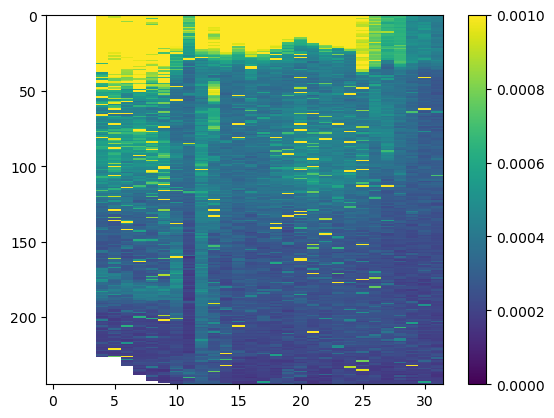

In [3]:
XX, YY = np.meshgrid(np.arange(bbp_qcd.shape[0]), np.arange(bbp_qcd.shape[1]))
plt.pcolormesh(XX, YY, bbp_qcd.T,vmin = 0, vmax = 1e-3)
plt.gca().invert_yaxis()
plt.colorbar()

In [4]:
briggs_values = BriggsDecomposition(bbp_qcd, depth)
new_values = BriggsDecomposition_Modified(bbp_qcd, depth)

/Users/epark/Documents/GitHub/spike_decomp/spike_fxns.py:125: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  noise_mean[i]=mean_df.loc[i]
/Users/epark/Documents/GitHub/spike_decomp/spike_fxns.py:200: RuntimeWarning: All-NaN slice encountered
  noise_med = np.nanmedian(residual_spikes, axis=1)
/Users/epark/opt/anaconda3/envs/spike_env/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1598: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/Users/epark/Documents/GitHub/spike_decomp/spike_fxns.py:234: RuntimeWarning: Mean of empty slice
  blank_new = np.matlib.repmat(np.nanmean(blank_noise_new, axis = 1).reshape(-1,1),1,depth.shape[1])
/Users/epark/opt/anaconda3/envs/spike_env/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:1617: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


/var/folders/lj/ln2kqf0x2k795vs_453ytwp00000gn/T/ipykernel_19844/3388590433.py:24: RuntimeWarning: Mean of empty slice
  ax.hist(np.nanmean(new_values['bbr'],axis=1), color = 'tab:orange')
/var/folders/lj/ln2kqf0x2k795vs_453ytwp00000gn/T/ipykernel_19844/3388590433.py:25: RuntimeWarning: Mean of empty slice
  ax.axvline(np.nanmedian(np.nanmean(new_values['bbr'],axis=1)), color = 'tab:orange')


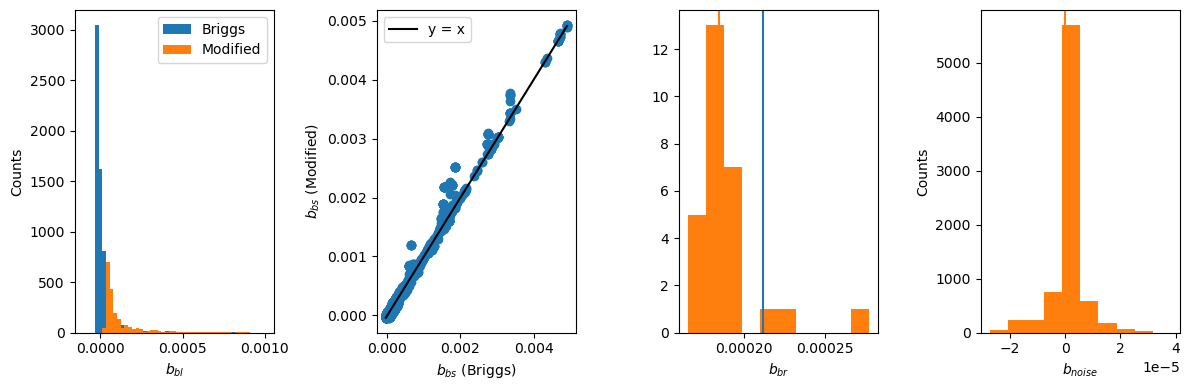

In [5]:
fig = plt.figure(figsize = (12, 4))
rr = 1; cc = 4
ax = fig.add_subplot(rr,cc,1)
bbl_bins = np.linspace(-1e-4, 1e-3)
ax.hist(briggs_values['bbl'].flatten(),bins = bbl_bins,
       label ='Briggs');
ax.hist(new_values['bbl'].flatten(),bins = bbl_bins,label = 'Modified');
ax.legend()
ax.set_ylabel('Counts')
ax.set_xlabel('$b_{bl}$')

ax = fig.add_subplot(rr,cc,2)
x =briggs_values['bbs'].flatten()
y = new_values['bbs'].flatten()
ax.scatter(x,y)
xrange = np.linspace(np.nanmin(x), np.nanmax(x))
ax.plot(xrange, xrange, 'k-',label = 'y = x')
ax.legend()
ax.set_ylabel('$b_{bs}$'+ ' (Modified)')
ax.set_xlabel('$b_{bs}$'+ ' (Briggs)')

ax = fig.add_subplot(rr,cc,3)
ax.axvline(np.nanmedian(briggs_values['bbr']), color='tab:blue')
ax.hist(np.nanmean(new_values['bbr'],axis=1), color = 'tab:orange')
ax.axvline(np.nanmedian(np.nanmean(new_values['bbr'],axis=1)), color = 'tab:orange')
ax.set_xlabel('$b_{br}$')

ax = fig.add_subplot(rr,cc,4)
ax.hist(new_values['noise'].flatten(),color = 'tab:orange')
ax.axvline(np.nanmean(new_values['noise']), color = 'tab:orange')
ax.set_xlabel('$b_{noise}$')
ax.set_ylabel('Counts')
fig.tight_layout()

Text(0.5, 1.0, '$b_{bs}$')

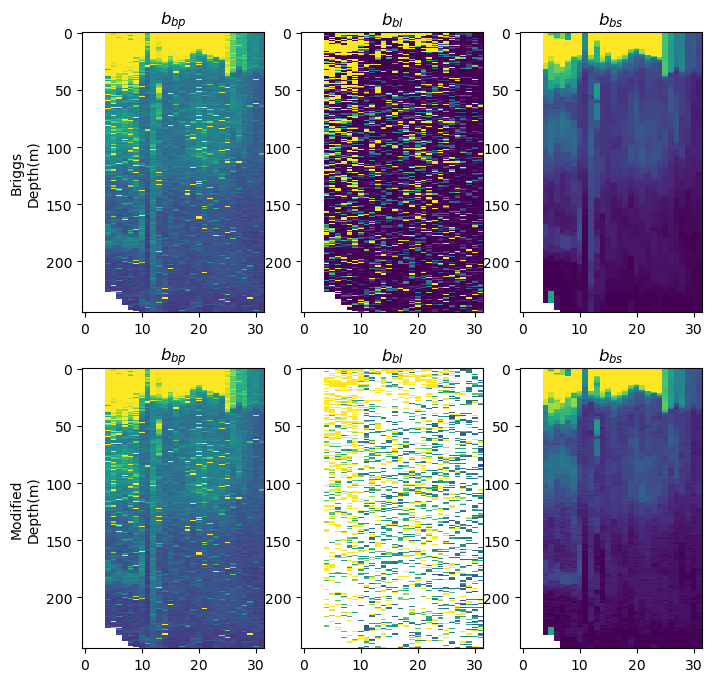

In [19]:
fig = plt.figure(figsize = (8,8))
rr = 2; cc = 3

# New
ax= fig.add_subplot(rr,cc,1)
ax.pcolormesh(XX, YY, bbp_qcd.T,vmin = 0, vmax = 1e-3)
ax.invert_yaxis()
ax.set_title('$b_{bp}$')
ax.set_ylabel('Briggs\nDepth(m)')

ax= fig.add_subplot(rr,cc,2)
ax.pcolormesh(XX,YY, briggs_values['bbl'].T,
             vmin = 0, vmax = 1e-4)
ax.invert_yaxis()
ax.set_title('$b_{bl}$')

ax= fig.add_subplot(rr,cc,3)
ax.pcolormesh(XX,YY, briggs_values['bbs'].T,
             vmin = 0, vmax = 1e-3)
ax.invert_yaxis()
ax.set_title('$b_{bs}$')

# New
ax= fig.add_subplot(rr,cc,4)
ax.pcolormesh(XX, YY, bbp_qcd.T,vmin = 0, vmax = 1e-3)
ax.invert_yaxis()
ax.set_title('$b_{bp}$')
ax.set_ylabel('Modified\nDepth(m)')

ax= fig.add_subplot(rr,cc,5)
ax.pcolormesh(XX,YY, new_values['bbl'].T,
             vmin = 0, vmax = 1e-4)
ax.invert_yaxis()
ax.set_title('$b_{bl}$')

ax= fig.add_subplot(rr,cc,6)
ax.pcolormesh(XX,YY, new_values['bbs'].T,
             vmin = 0, vmax = 1e-3)
ax.invert_yaxis()
ax.set_title('$b_{bs}$')